In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
7924,Infiniti,QX50,2016,premium unleaded (recommended),325.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,24,17,190,35850
10227,Toyota,Tacoma,2017,regular unleaded,278.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Compact,Crew Cab Pickup,24,19,2031,29690
8105,Dodge,RAM 250,1993,regular unleaded,230.0,8.0,MANUAL,rear wheel drive,2.0,NaN,Large,Extended Cab Pickup,16,12,1851,2000
7366,Mitsubishi,Outlander Sport,2016,regular unleaded,168.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,28,23,436,22495
7417,Porsche,Panamera,2015,premium unleaded (required),420.0,6.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Luxury,High-Performance",Large,Sedan,26,17,1715,125600


<AxesSubplot:xlabel='Number of Doors'>

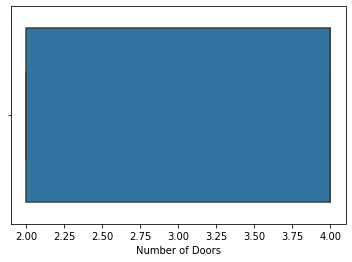

In [2]:
# No outliers
sns.boxplot(x=df['Number of Doors'])
# Esta gráfica representa todos los valores están comprendidos dentro del rango, no hay anomalias

<AxesSubplot:xlabel='Engine HP'>

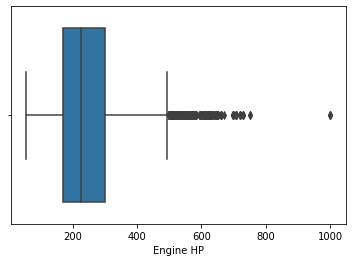

In [3]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [9]:
import numpy as np 

s = [1,3,3,3,3,3,3,3,3,3,3,3.5,4,4,4,4,4,4,4,4,4,4,5,5,5,5]
s_a = np.asarray(s)

length = len(s)
media = s_a.mean()
std = s_a.std()
mediana = np.median(s_a)

print("media:", s_a.mean())
print("std:", s_a.std())
print("median:", mediana)   # La mediana es el percentil 50
print("length:", length)

media: 3.6346153846153846
std: 0.8721954208037359
median: 4.0
length: 26


In [41]:
diferencia = abs(media - 1)
print("Diferencia con respecto a la media:\n", diferencia)

Diferencia con respecto a la media:
 6.166666666666667


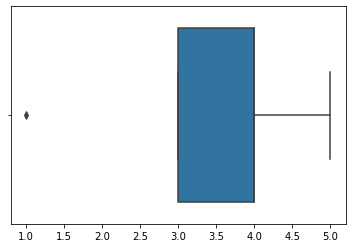

In [44]:
sns.boxplot(x=s_a)
# En este caso Q3 = 3 (cuartil 3) que a su vez es el mínimo de la tabla (porque no hay otra linea como la que señala el max, estan superpuestas)
# La mediana = 3.5
# Q1 = 4 el último de la caja
# max que considera no anomalo es 5
# Tenemos un valor anómalo = 1

In [ ]:
# Las anomalías pueden parecer datos normales porque tenemos muy pocos datos

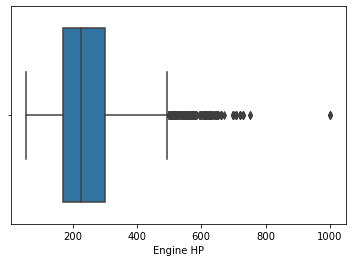

In [46]:
# Outliers = anomalías
sns.boxplot(x=df['Engine HP'])

In [45]:
df["Engine HP"].quantile(0.25)

170.0

In [47]:
df["Engine HP"].quantile(0.75)

300.0

In [13]:
df["Popularity"].max()  #int

5657

In [14]:
df["Popularity"].quantile(1)    #float

5657.0

In [15]:
df["Popularity"].min()

2

In [16]:
df["Popularity"].quantile(0)

2.0

In [19]:
df["Popularity"].quantile(0.75)

2009.0

In [48]:
df["Popularity"].quantile(0.5)  #median

1385.0

In [49]:
df["Popularity"].median()

1385.0

<AxesSubplot:xlabel='Popularity'>

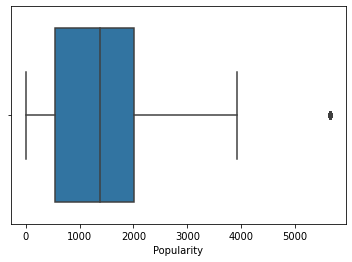

In [10]:
sns.boxplot(x=df['Popularity'])

In [6]:
df.quantile(0.25)

Year                 2007.0
Engine HP             170.0
Engine Cylinders        4.0
Number of Doors         2.0
highway MPG            22.0
city mpg               16.0
Popularity            549.0
MSRP                21000.0
Name: 0.25, dtype: float64

In [7]:
df.quantile(0.75)

Year                 2016.00
Engine HP             300.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            30.00
city mpg               22.00
Popularity           2009.00
MSRP                42231.25
Name: 0.75, dtype: float64

In [52]:
# Hard technique

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [53]:
df.shape

(11914, 16)

In [54]:
IQR * 1.5

Year                   13.500
Engine HP             195.000
Engine Cylinders        3.000
Number of Doors         3.000
highway MPG            12.000
city mpg                9.000
Popularity           2190.000
MSRP                31846.875
dtype: float64

In [55]:
# Límite superior antes de outlier
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [58]:
# Límite inferior antes de outlier
(Q1 - (1.5 * IQR))

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

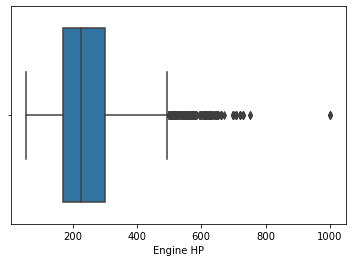

In [60]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [63]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

valor max para engine HP 1001.0


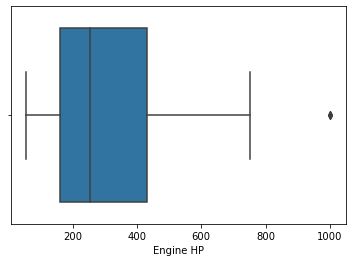

In [79]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR_RIC = Q3 - Q1
limite_inferior = (Q1 - 1.5 * IQR_RIC)
limite_superior = (Q3 + 1.5 * IQR_RIC)

# Get the real rows 
# Esto está cogiendo todos los valores que están dentro de los límites superior e inferior del boxplot que representan outliers
df2 = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
# Valores que están fuera del rango --> Los outliers
print("valor max para engine HP", df2['Engine HP'].quantile(1))
sns.boxplot(x=df2['Engine HP'])

#NO LO ENTENDI - PREGUNTAR EL LUNES. POR QUE SE VEN LOS VALORES DE 200-400 SI EN TEORIA SOLO ESTAMOS MOSTRANDO LAS ANOMALIAS

In [48]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [ ]:
#~ --> altGr + 4 y espacio
#| --> altGr + 1

In [81]:
# Get the opposite --> Valores que no son outliers
df3 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)
df3.shape
# la tabla sin outliers queda con 9084 elementos de 2830 originales que teniamos, lo que significa que estamos perdiendo bastantes datos. Si es el caso podríamos ajustar el "1.5" que multiplicamos con IQR para no perder tantos datos. Esto haría que los datos no fuesen completamente objetivos, pero dependiendo de los datos no podemos siempre usar el mismo threshold

(2830, 16)


(9084, 16)

In [87]:
df3['Engine HP'].min()

66.0

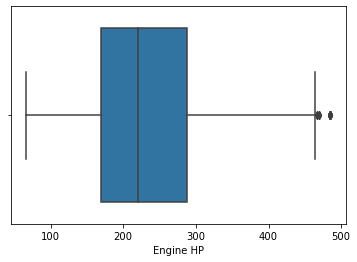

In [85]:
sns.boxplot(x=df3['Engine HP'])

Year                 2016.00
Engine HP             288.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            31.00
city mpg               22.00
Popularity           1851.00
MSRP                39408.75
Name: 0.75, dtype: float64

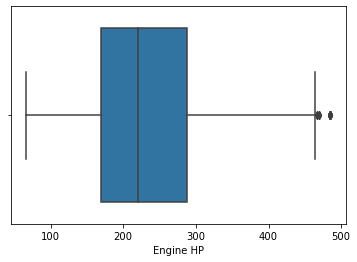

In [50]:
# Outliers After
sns.boxplot(x=df2['Engine HP'])

df2.quantile(0.75)

In [45]:
df.quantile(1)

Year                   2017.0
Engine HP              1001.0
Engine Cylinders         16.0
Number of Doors           4.0
highway MPG             354.0
city mpg                137.0
Popularity             5657.0
MSRP                2065902.0
Name: 1, dtype: float64